In [5]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath('Sources'))
import about_ml_models as mlm

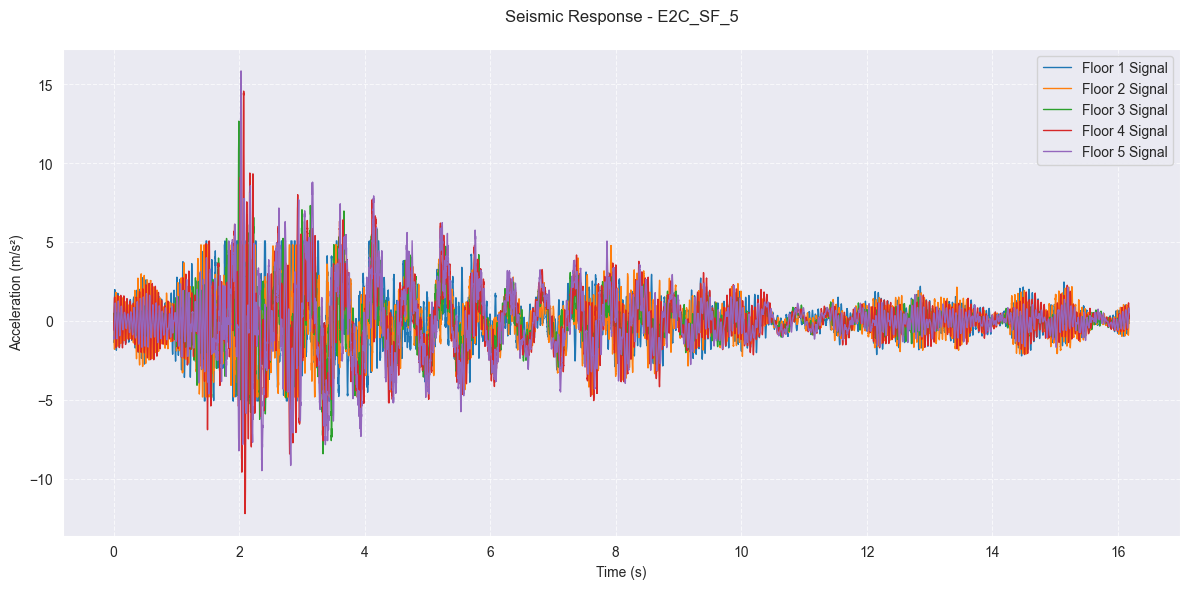


SEISMIC SIGNAL REPORT

GENERAL INFORMATION:
--------------------------------------------------
Signal ID: E2C_SF_5
Structure E2: 6 columns, 5 levels
Earthquake C: Imperial Valley, 10/15/1979, El Centro
Damage Status: Undamaged
--------------------------------------------------

INTENSITY MEASURES BY FLOOR:
--------------------------------------------------
+------+-------------------------------+------------+------------+------------+------------+------------+
| IM   | Description                   |    Floor 1 |    Floor 2 |    Floor 3 |    Floor 4 |    Floor 5 |
+======+===============================+============+============+============+============+============+
| PGA  | Peak Ground Acceleration      |     4.1447 |     4.328  |     6.8525 |     6.4829 |     9.0518 |
+------+-------------------------------+------------+------------+------------+------------+------------+
| PGV  | Peak Ground Velocity          |     0.4116 |     0.4613 |     0.3441 |     0.4169 |     0.4948 |
+---

In [7]:
#falla =True -> para obtener datos con fallas estructurales
#falla =False -> para obtener datos sin fallas estructurales
#falla =None -> selección aleatoria de los datos

data_IM, X_new_scaled=mlm.get_seismic_signals(falla=None)

In [8]:
# Load models
models_det = mlm.load_models()

# Make predictions
results, consensus = mlm.predict_damage(X_new_scaled, models_det)

C:\Users\ASUS\PycharmProjects\MASCON\Python - MASCON\.venv\Lib\site-packages\xgboost\lib\xgboost.dll

STRUCTURAL DAMAGE PREDICTION REPORT

Random Forest [0] 0.00%
XGBoost [0] 0.38%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Neural Network [0] 0.65%
MODEL PREDICTIONS:
--------------------------------------------------
+----------------+--------------+----------------------+
| Model          | Prediction   | Damage Probability   |
+================+==============+======================+
| Random Forest  | No Damage    | 0.00%                |
+----------------+--------------+----------------------+
| XGBoost        | No Damage    | 0.38%                |
+----------------+--------------+----------------------+
| Neural Network | No Damage    | 0.65%                |
+----------------+--------------+----------------------+


CONSENSUS ANALYSIS:
--------------------------------------------------
Model Agreement: 0%
Final Assessment: LOW PROBABILITY OF DAMAGE
------------------------------------

In [9]:
# damage location prediction
if consensus>0.5:
    mlm.ubicar_falla(data_IM)